In [1]:
!pip install pymysql

In [2]:
import pymysql

In [5]:
MYSQL_USER_DATA_SAVED_FILE = "res/mysql/userinfo"

In [6]:
# 최초 한 번만 구동시키면 된다.
# 본인 계정을 숨길 생각이라면 한 번 사용 이후에 id, password를 지우도록 한다.
import pickle

mysql_user_info = dict({
    'user_id': 'khweb',
    'password': 'mysql비밀번호입력하시오.'
})

f = open(MYSQL_USER_DATA_SAVED_FILE, 'wb')
pickle.dump(mysql_user_info, f)
f.close()

del mysql_user_info

In [7]:
import pickle

f = open(MYSQL_USER_DATA_SAVED_FILE, 'rb')
mysql_user_info = pickle.load(f)
f.close()

#print(mysql_user_info)

In [9]:
# DB 연결
db = pymysql.connect(
    # localhost와 같은 아이피 주소임
    host = '127.0.0.1',
    # MySQL의 포트 번호
    port = 3306,
    # 아이디
    user = mysql_user_info['user_id'],
    # 비밀번호
    passwd = mysql_user_info['password'],
    # 사용하려는 스키마
    db = 'pydb'
)

# MySQL 프롬프트에서 1. 'pydb'라는 스키마 생성 : create database pydb default character set utf8;
# 2. 권한 설정 : grant all on *.* to 'khweb'@'localhost';

print(db)

In [10]:
# 이제 DB에서 select 등을 수행했을 때
# 나오는 결과를 순회할 수 있도록 지원하는 객체를 가져온다.
cursor = db.cursor()

print(cursor)

In [11]:
# MySQL 수동 쿼리를 적용하여 table을 생성해보도록 한다.
sql = """
    create table pydbtest(
        id int unsigned not null auto_increment,
        name varchar(20) not null,
        price int not null,
        primary key(id)
    )
"""

# 실제 SQL Query를 실행하는 코드
cursor.execute(sql)

# 작업한 내용을 실제 DB에 적용함
db.commit()

# 작업 완료 이후 DB 연결을 끊는다.
db.close()

print("테이블 생성 성공!")

테이블 생성 성공!


In [12]:
# insert 처리
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    insert into pydbtest(name, price) values(%s, %s)
"""

# %s에 해당하는 데이터들을 배치한다.
cursor.execute(sql, ('Xeon Server', 10000000))
cursor.execute(sql, ('FPGA Server', 34000000))
cursor.execute(sql, ('GPU Server', 20000000))
cursor.execute(sql, ('RTX 3090', 40000000))

db.commit()

db.close()

print("테이블에 값 넣기 성공!")

테이블에 값 넣기 성공!


In [13]:
# select(값 가져오기)
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    select * from pydbtest;
"""

# %s에 해당하는 데이터들을 배치한다.
cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다.
rows = cursor.fetchall()
print(rows)

db.close()

print("데이터 불러오기 성공!")

((1, 'Xeon Server', 10000000), (2, 'FPGA Server', 34000000), (3, 'GPU Server', 20000000), (4, 'RTX 3090', 40000000))
데이터 불러오기 성공!


In [14]:
# select(값 가져오기) 낱개로 가져오기
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    select * from pydbtest;
"""

# %s에 해당하는 데이터들을 배치한다.
cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다.
rows = cursor.fetchall()

for row in rows:
    print(row)

db.close()

print("데이터 낱개로 불러오기 성공!")

(1, 'Xeon Server', 10000000)
(2, 'FPGA Server', 34000000)
(3, 'GPU Server', 20000000)
(4, 'RTX 3090', 40000000)
데이터 낱개로 불러오기 성공!


In [15]:
# 낱개 내에서 각각의 데이터를 얻기(딕셔너리 형식이라 키값으로 뽑으면 됨)
# select(값 가져오기) 낱개로 가져오기
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor(pymysql.cursors.DictCursor)

sql = """
    select * from pydbtest;
"""

# %s에 해당하는 데이터들을 배치한다.
cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다.
rows = cursor.fetchall()

for row in rows:
    print('id: ', row['id'], ', name: ', row['name'], ', price: ', row['price'])

db.close()

print("데이터 낱개로 불러와 특정값 추출하기 성공!")

id:  1 , name:  Xeon Server , price:  10000000
id:  2 , name:  FPGA Server , price:  34000000
id:  3 , name:  GPU Server , price:  20000000
id:  4 , name:  RTX 3090 , price:  40000000
데이터 낱개로 불러와 특정값 추출하기 성공!


In [16]:
# 입력한 데이터값 정리하기(테이블 삭제)
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    drop table pydbtest;
"""

cursor.execute(sql)

db.commit()
db.close()

print("테이블 삭제 성공!")

테이블 삭제 성공!


In [17]:
# 소수점 데이터 처리하기!
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    create table power_data(
        no integer not null auto_increment primary key,
        voltage float not null,
        current float not null,
        vendor text null,
        name text not null,
        reg_date timestamp not null default now()
    )
"""

cursor.execute(sql)
db.commit()
db.close()

print("float 형식의 테이블 생성 성공!")

float 형식의 테이블 생성 성공!


In [18]:
import time
import math
import calendar
import datetime
import numpy as np

# 파이썬 라이브러리 import로 추가

In [19]:
sample_time = np.arange(0, 10, 0.001)

print(sample_time)

[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]


In [20]:
sample_time = np.arange(0, 10, 0.01)

print(sample_time)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

In [24]:
# 데이터 개수에 따른 랜덤을 적절하게 만들어줌(자연스럽게)
noise = np.random.normal(size = len(sample_time))

print(noise)

[ 7.88160264e-01 -4.40247709e-01  6.34940944e-01 -7.15389309e-01
 -9.50505641e-02 -3.70809918e-01  2.40309127e-01  2.32551105e+00
  9.37396251e-01  4.59092988e-01  6.84849451e-01  2.11813829e+00
 -1.75011984e+00 -4.46932011e-01  5.20883311e-01  1.40923506e-01
 -3.12392750e-01  1.60293564e-01 -2.35866766e-01 -6.02531447e-01
  9.86319121e-01  4.60421402e-01 -2.56350216e+00 -2.55124636e+00
 -3.66189803e-01  2.90681367e+00  6.03881808e-01  5.54365133e-01
  1.18556064e+00  1.11010840e+00 -4.66715312e-01  4.47781018e-01
  2.94073883e-01  1.91475858e+00  1.13578706e-01  4.13085105e-01
 -1.63051666e+00  9.48432901e-01 -3.56036033e-01  3.01011615e-01
  4.08005593e-02  9.42016381e-02  4.16174674e-01  8.53987940e-01
  2.78165513e-01  2.33925646e-01 -1.24587048e+00 -3.29567560e-01
  2.12056547e+00  6.01715118e-01  4.66463891e-02 -2.37857707e+00
 -1.67613042e+00  1.59439846e+00 -3.59813817e-01 -1.67064590e+00
  7.44144142e-01 -1.73330129e-02 -1.09468642e+00 -2.49214949e+00
 -1.00877036e+00  8.51780

In [25]:
voltage = 3 * np.cos(5 * sample_time) + noise
current = 3 * np.sin(3 * sample_time + (math.pi / 3)) + noise

print(voltage)
print(current)

[ 3.78816026  2.55600307  3.61995344  2.25092392  2.84514917  2.53592735
  3.10631859  5.14362919  3.70057923  3.16043429  3.31759714  4.67571185
  0.72588701  1.94131938  2.81540987  2.33599011  1.77772738  2.140243
  1.62896314  1.14251782  2.60722604  1.95313455 -1.2027138  -1.32578403
  0.72088346  3.85278076  1.40637829  1.21138519  1.69546207  1.47161671
 -0.25450371  0.5101655   0.20647532  1.67739591 -0.27295478 -0.12165306
 -2.31212295  0.12166216 -1.32590473 -0.80953088 -1.20763995 -1.28901644
 -1.09836364 -0.78808506 -1.48733784 -1.65059522 -3.24469854 -2.43770679
 -0.09161568 -1.70897864 -2.35678446 -4.86873768 -4.24679668 -1.05034813
 -3.07203024 -4.44355304 -2.08252288 -2.89069473 -4.00756092 -5.4372561
 -3.97874785 -2.13564487 -3.87361895 -2.39238258 -1.182392   -3.56933369
 -3.25348377 -3.35324861 -3.58231545 -2.70701869 -2.37095404 -3.05039856
 -3.7474032  -1.87360937 -1.34166897 -2.9690293  -1.59506882 -0.75645162
 -0.8975367  -2.63988337 -1.62501868  0.1347092  -0.71

In [26]:
!pip install matplotlib

In [27]:
import matplotlib.pyplot as plt

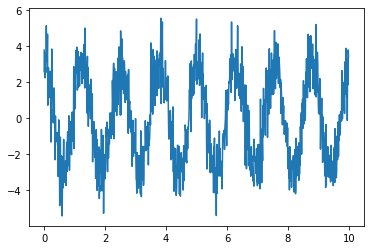

In [28]:
plt.plot(sample_time, voltage)
plt.show()

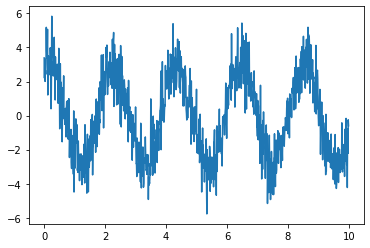

In [29]:
plt.plot(sample_time, current)
plt.show()

In [33]:
# 현재 시간값을 컴퓨터가 계산하고 있는 수치로 가져옴
ts = calendar.timegm(time.gmtime())

print(ts)

# sample_time이 이미 1000개짜리 배열이므로
# 곱셈을 수행할 경우 알아서 1000개 배열에 1000씩 곱해짐(자동으로)
# 샘플 타임이 0.001초(1 / 1000 초)를 대상으로 하고 있음
# 전체 샘플 타임의 개수는 10000개(만개)이므로 1 / 1000 초 단위 샘플링을 하면
# 10000 / 1000 = 10초간의 데이터를 수집함을 의미함
ts = (sample_time * 1000) + ts

print(ts)

1633942164
[1.63394216e+09 1.63394217e+09 1.63394218e+09 1.63394219e+09
 1.63394220e+09 1.63394221e+09 1.63394222e+09 1.63394223e+09
 1.63394224e+09 1.63394225e+09 1.63394226e+09 1.63394227e+09
 1.63394228e+09 1.63394229e+09 1.63394230e+09 1.63394231e+09
 1.63394232e+09 1.63394233e+09 1.63394234e+09 1.63394235e+09
 1.63394236e+09 1.63394237e+09 1.63394238e+09 1.63394239e+09
 1.63394240e+09 1.63394241e+09 1.63394242e+09 1.63394243e+09
 1.63394244e+09 1.63394245e+09 1.63394246e+09 1.63394247e+09
 1.63394248e+09 1.63394249e+09 1.63394250e+09 1.63394251e+09
 1.63394252e+09 1.63394253e+09 1.63394254e+09 1.63394255e+09
 1.63394256e+09 1.63394257e+09 1.63394258e+09 1.63394259e+09
 1.63394260e+09 1.63394261e+09 1.63394262e+09 1.63394263e+09
 1.63394264e+09 1.63394265e+09 1.63394266e+09 1.63394267e+09
 1.63394268e+09 1.63394269e+09 1.63394270e+09 1.63394271e+09
 1.63394272e+09 1.63394273e+09 1.63394274e+09 1.63394275e+09
 1.63394276e+09 1.63394277e+09 1.63394278e+09 1.63394279e+09
 1.63394280e+

In [34]:
# 실제 db에 넣기 위해 상호간의 데이터 타입을 np.float32로 맞춰줌(이것을 해줘야 DB에 입력 가능함)
sample_time = np.array(sample_time, dtype=np.float32)
voltage = np.array(voltage, dtype=np.float32)
current = np.array(current, dtype=np.float32)

In [36]:
curr_time = []

# datetime.datetime을 통해 시간값을 제어할 수 있으며
# datetime.datetime.fromtimestamp(컴퓨터시간).strftime(형식)을 통해
# 원하는 형태로 시간을 형 변환할 수 있음
for i in range(len(sample_time)):
    curr_time.append(
        datetime.
            datetime.
                fromtimestamp(ts[i]).
                    strftime('%Y-%m-%d %H:%M:%S')
    )
    
print(curr_time)

['2021-10-11 17:49:24', '2021-10-11 17:49:34', '2021-10-11 17:49:44', '2021-10-11 17:49:54', '2021-10-11 17:50:04', '2021-10-11 17:50:14', '2021-10-11 17:50:24', '2021-10-11 17:50:34', '2021-10-11 17:50:44', '2021-10-11 17:50:54', '2021-10-11 17:51:04', '2021-10-11 17:51:14', '2021-10-11 17:51:24', '2021-10-11 17:51:34', '2021-10-11 17:51:44', '2021-10-11 17:51:54', '2021-10-11 17:52:04', '2021-10-11 17:52:14', '2021-10-11 17:52:24', '2021-10-11 17:52:34', '2021-10-11 17:52:44', '2021-10-11 17:52:54', '2021-10-11 17:53:04', '2021-10-11 17:53:14', '2021-10-11 17:53:24', '2021-10-11 17:53:34', '2021-10-11 17:53:44', '2021-10-11 17:53:54', '2021-10-11 17:54:04', '2021-10-11 17:54:14', '2021-10-11 17:54:24', '2021-10-11 17:54:34', '2021-10-11 17:54:44', '2021-10-11 17:54:54', '2021-10-11 17:55:04', '2021-10-11 17:55:14', '2021-10-11 17:55:24', '2021-10-11 17:55:34', '2021-10-11 17:55:44', '2021-10-11 17:55:54', '2021-10-11 17:56:04', '2021-10-11 17:56:14', '2021-10-11 17:56:24', '2021-10-1

In [37]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

# 소수점 형식의 데이터와 현재 시간값을 기록하도록 한다.
sql = """
    insert into power_data(
        voltage, current, vendor, name, reg_date
    ) values(
        %s, %s, %s, %s, %s
    )
"""

# volt, curr이 np.float32
# DB에 넣는 과정은 %s(문자열) 형식이므로 반드시 str()로 한 번 감싸줘야함
try:
    with db.cursor() as cursor:
        for i in range(len(sample_time)):
            cursor.execute(sql,
                (
                    str(voltage[i]),
                    str(current[i]),
                    'YOON',
                    'P32N21BTN77PW',
                    curr_time[i]
                )
            )
            
            db.commit()
finally:
    db.close()
    
print('소수점 형식 데이터 및 날짜 형식 데이터 입력 완료!')

소수점 형식 데이터 및 날짜 형식 데이터 입력 완료!
